In [1]:
import pandas as pd 
import numpy as np


In [2]:
data=pd.read_csv("max30102_data9.csv")

In [3]:
print(data.iloc[0, :])

IR     376
Red    443
Name: 0, dtype: int64


In [4]:
data.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [5]:
IR=data["IR"].values
Red=data["Red"].values

In [6]:
IR=np.array(IR)
Red=np.array(Red)

In [7]:
IR=data["IR"].values
Red=data["Red"].values

heart_rate_data =[IR, Red]

In [8]:
import numpy as np

# Stack IR and Red as columns to create a 2D array of shape (2049, 2)
heart_rate_array = np.column_stack((IR, Red))
print(heart_rate_array)


[[   376    443]
 [   381    441]
 [   402    460]
 ...
 [103361  78048]
 [103296  78067]
 [103309  78006]]


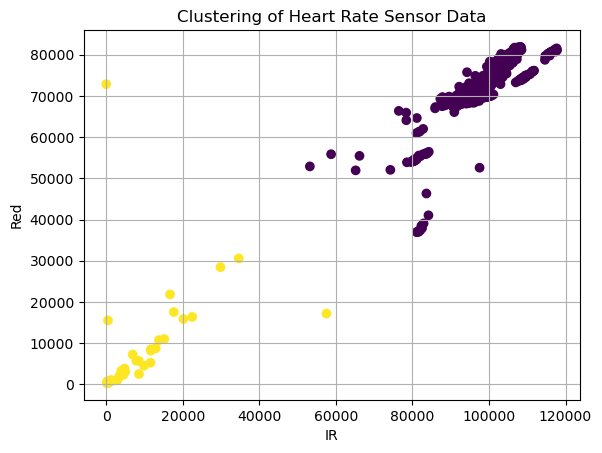

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Apply k-means clustering (e.g., 2 clusters: healthy vs abnormal)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(heart_rate_array)

# Predict cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(heart_rate_array[:, 0], heart_rate_array[:, 1], c=labels, cmap='viridis')
plt.title('Clustering of Heart Rate Sensor Data')
plt.xlabel('IR')
plt.ylabel('Red')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Simulated sensor data (IR and Red)


# Apply KMeans
# heart_rate_array is already defined in cell 7, so we can use it directly
labels = kmeans.fit_predict(heart_rate_array)


In [14]:
print(labels)

[1 1 1 ... 0 0 0]


In [15]:
print(heart_rate_data[0])

[   376    381    402 ... 103361 103296 103309]


In [58]:
# Create DataFrame with labels
df = pd.DataFrame(data, columns=["IR", "Red"])
df["Cluster"] = labels  # This is your target for supervised training
print(df.IR.min(), df.IR.max())
print(df.Red.min(), df.Red.max())
# Split the data into features and target   


0 117792
355 81903


In [67]:
print(df[["IR", "Red"]].head())
X = df[["IR", "Red"]].values
y = df["Cluster"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


      IR    Red
0    376    443
1    381    441
2    402    460
3  13785  10740
4  78367  65949
X_train shape: (1639, 2)
y_train shape: (1639,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for normalization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

         IR       Red  Cluster
0  0.003192  0.001079        1
1  0.003235  0.001055        1
2  0.003413  0.001288        1
3  0.117028  0.127348        1
4  0.665300  0.804361        0


In [57]:
print(df.IR.min(), df.IR.max())
print(df.Red.min(), df.Red.max())
# Split the data into features and target   

0.0 1.0
0.0 1.0


In [ ]:
#import pandas as pd

# Assuming your DataFrame is called df
#df['Label'] = ((df['IR'] > 10000) & (df['Red'] > 50000)).astype(int)


In [18]:
print(df.head(50))

          IR       Red  Cluster
0   0.003192  0.001079        1
1   0.003235  0.001055        1
2   0.003413  0.001288        1
3   0.117028  0.127348        1
4   0.665300  0.804361        0
5   0.804910  0.892100        0
6   0.818536  0.913989        0
7   0.844624  0.918931        0
8   0.848869  0.922659        0
9   0.844463  0.918943        0
10  0.847163  0.921261        0
11  0.848317  0.920489        0
12  0.842171  0.916945        0
13  0.841314  0.916663        0
14  0.835668  0.914247        0
15  0.847630  0.921776        0
16  0.851535  0.924560        0
17  0.847163  0.921617        0
18  0.848750  0.923750        0
19  0.854370  0.926890        0
20  0.857240  0.930311        0
21  0.858479  0.931942        0
22  0.858131  0.932972        0
23  0.066524  0.066010        1
24  0.072153  0.065826        1
25  0.003235  0.001067        1
26  0.003370  0.001300        1
27  0.003319  0.001570        1
28  0.753014  0.835459        0
29  0.815633  0.876208        0
30  0.82

In [20]:


# Split into input (X) and target (y)
X = df[["IR", "Red"]]  # Reshape X to be a 2D array
y = df["Cluster"]  # Reshape y to be a 2D array for compatibility with Keras

# Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [22]:
print(X_train)
print( y_train)


            IR       Red
1774  0.003141  0.002060
1125  0.866061  0.937742
1595  0.895901  0.951170
1784  0.003294  0.002023
299   0.003464  0.002968
...        ...       ...
1791  0.003218  0.002085
1096  0.827170  0.839248
1932  0.873005  0.957350
235   0.003651  0.002882
1061  0.677092  0.657686

[1639 rows x 2 columns]
1774    1
1125    0
1595    0
1784    1
299     1
       ..
1791    1
1096    0
1932    0
235     1
1061    0
Name: Cluster, Length: 1639, dtype: int32


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model_simple = Sequential([
    Dense(16, input_dim=2, activation='relu'), # One hidden layer
    Dense(1, activation='sigmoid')             # Output layer for binary classification
])

optimizer = Adam(learning_rate=0.001) # Or other learning rate as discussed previously
model_simple.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

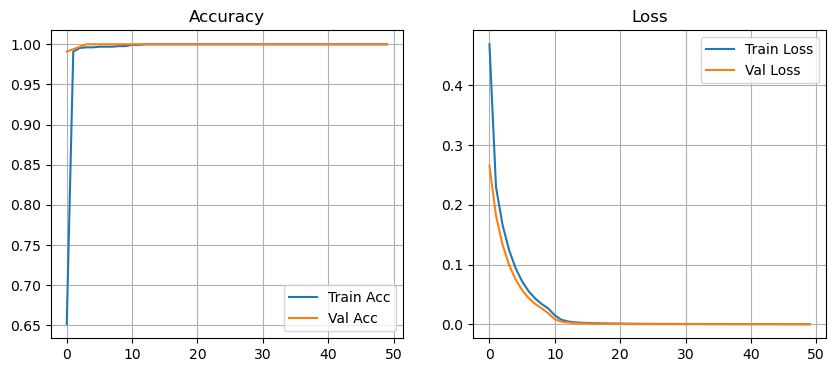

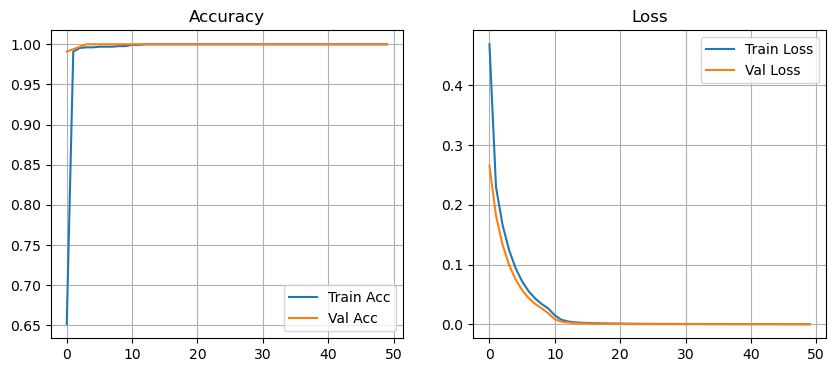

In [36]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback
import IPython.display as display

class LivePlotCallback(Callback):
    def on_train_begin(self, logs=None):
        self.accuracy = []
        self.loss = []
        self.val_accuracy = []
        self.val_loss = []
        self.fig, self.ax = plt.subplots(1, 2, figsize=(10, 4))

    def on_epoch_end(self, epoch, logs=None):
        self.accuracy.append(logs.get('accuracy'))
        self.loss.append(logs.get('loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.val_loss.append(logs.get('val_loss'))

        self.ax[0].clear()
        self.ax[1].clear()

        self.ax[0].plot(self.accuracy, label='Train Acc')
        self.ax[0].plot(self.val_accuracy, label='Val Acc')
        self.ax[0].set_title('Accuracy')
        self.ax[0].legend()
        self.ax[0].grid(True)

        self.ax[1].plot(self.loss, label='Train Loss')
        self.ax[1].plot(self.val_loss, label='Val Loss')
        self.ax[1].set_title('Loss')
        self.ax[1].legend()
        self.ax[1].grid(True)

        display.clear_output(wait=True)
        display.display(plt.gcf())

# Add callback to model training
history = model_simple.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2,
    validation_split=0.2,
    callbacks=[LivePlotCallback()],
    verbose=0
)


In [38]:
# Evaluate
loss, acc = model_simple.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.10f}")
print(f"Test Loss: {loss:.10f}")


Test Accuracy: 1.0000000000
Test Loss: 0.0000554719


In [54]:
print(model_simple.predict([[847630,921776]]))

1/1 [==============================] - 0s 28ms/step
[[0.]]


In [42]:
print("Model Summary:", model_simple.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                48        
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
Model Summary: None


In [51]:
print(model_simple.predict([[441,139]]))

1/1 [==============================] - 0s 39ms/step
[[0.]]


In [55]:
model_simple.save("heart_rate_model_simple.h5")

In [68]:
print(X_train.shape)

(1639, 2)


In [69]:
# --- IMPORTANT: Your Normalization Parameters (from your data output) ---
# These are the values you provided:
IR_MIN = 0.0
IR_MAX = 117792.0
RED_MIN = 355.0
RED_MAX = 81903.0

# --- Create a representative dataset generator for quantization ---
# This generator should yield samples that are ALREADY NORMALIZED,
# because your Keras model was trained on normalized data.
# Replace `your_raw_training_data_subset` with a small portion of your
# ORIGINAL, UNNORMALIZED training data (e.g., 100-500 samples).
# We will apply the normalization *inside* the generator.

# Example: Assuming you have a NumPy array or Pandas DataFrame of your raw training data
# `X_raw_train_subset` with columns 'IR' and 'Red'.
# For demonstration, let's create dummy raw data:
num_samples= 1639;
X_train[:, 0] = X_train[:, 0] * (IR_MAX - IR_MIN) + IR_MIN
X_train[:, 1] = X_train[:, 1] * (RED_MAX - RED_MIN) + RED_MIN


def representative_dataset_gen():
    for i in range(num_samples):
        raw_ir = X_train[i, 0]
        raw_red = X_train[i, 1]

        # Apply the same Min-Max normalization used during training
        normalized_ir = (raw_ir - IR_MIN) / (IR_MAX - IR_MIN)
        normalized_red = (raw_red - RED_MIN) / (RED_MAX - RED_MIN)

        # Yield the normalized sample (as a float32 NumPy array)
        yield [np.array([[normalized_ir, normalized_red]], dtype=np.float32)]

# Initialize the TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model_simple) # Use your actual 'model3'

# Apply optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Configure representative dataset for integer quantization
converter.representative_dataset = representative_dataset_gen

# Ensure that only integer operations are used, otherwise fallback to float
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Ensure the input and output tensors are also integer
# For 8-bit quantization, uint8 is common for inputs scaled 0-1, int8 for -1 to 1
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

# Convert the model
tflite_model = converter.convert()

# Save the quantized model
with open('heart_rate_model_simple_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

print("Quantized TFLite model saved as heart_rate_model_quantized.tflite")


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpaxc8qszf\assets
Quantized TFLite model saved as heart_rate_model_quantized.tflite


c:\Users\HP\miniconda3\envs\py310\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:

# Proceed with xxd to convert to .h file as before:
# xxd -i heart_rate_model_quantized.tflite > heart_rate_model_quantized.h

In [71]:
# Save this as: convert_to_c_array.py
import sys

def convert_to_c_array(tflite_model_path, output_header_path, variable_name="model"):
    with open(tflite_model_path, 'rb') as f:
        model_bytes = f.read()

    with open(output_header_path, 'w') as f:
        f.write(f'#ifndef {variable_name.upper()}_H\n')
        f.write(f'#define {variable_name.upper()}_H\n\n')
        f.write(f'const unsigned char {variable_name}[] = {{\n')

        for i, byte in enumerate(model_bytes):
            if i % 12 == 0:
                f.write('\n ')
            f.write(f'0x{byte:02x}, ')

        f.write('\n};\n')
        f.write(f'const unsigned int {variable_name}_len = {len(model_bytes)};\n\n')
        f.write(f'#endif // {variable_name.upper()}_H\n')

    print(f"Header file '{output_header_path}' generated successfully.")


# Convert the model to TFLite format

In [72]:
# Example usage
#convert_to_c_array("model.tflite", "model.h", "model")
convert_to_c_array("heart_rate_model_simple_quantized.tflite", "model_simple.h", "model_simple")

Header file 'model_simple.h' generated successfully.
